# Vehicle CO2 Emission Prediction using Machine Learning

In this notebook we will be predicting CO2 emissions scores (182 to 0) of new light duty vehicles based on fuel consumption scores and some other vehicle characteristics. The dataset was downloaded from Canada.ca website (https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) and was also used in IBM's Machine Learning module as part of my Data Science Professional Certification.

### Data Points:


* MODELYEAR 
* MAKE
* MODEL 
* VEHICLE CLASS 
* ENGINE SIZE 
* CYLINDERS 
* TRANSMISSION 
* FUELTYPE 
* FUEL CONSUMPTION in CITY(L/100 km) 
* FUEL CONSUMPTION in HWY (L/100 km) 
* FUEL CONSUMPTION COMB (L/100 km) 
* CO2 EMISSIONS (g/km)

### Libraries Used:
* matplotlib
* pandas
* pylab
* numpy
* sklearn


We will first begin with importing some of the libraries in so that we can plot and explore that dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Filtering

Although there is a good amount of information present in this dataset, we will not be using all of it while conducting regression. We will only be look forward to using quantitative variables such as Engine Size, Cylinders, Fuel consumption and CO2 emissions.

In [6]:
filtered_data= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

filtered_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


### Data Exploring

It is important to understand the correlation of data points to the target variable because they influence the prediction. Moreover, the better we understand the data set, the better we will know how to manipulate it (such as filling missing values)

I decided to look at the scatter plots of each variable distribution and how they correlate with target (CO2 Emission) 

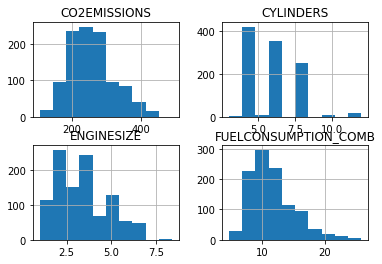

In [44]:
histogram = filtered_data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
histogram.hist()
plt.show()

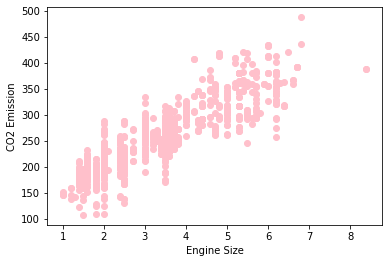

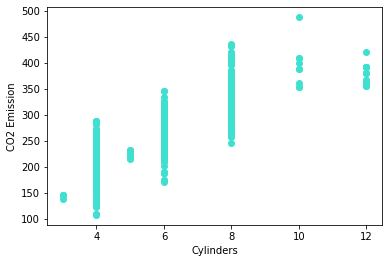

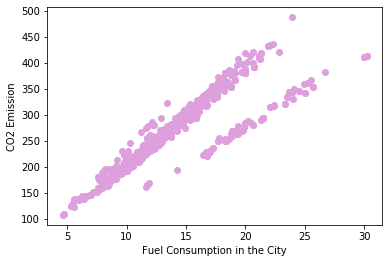

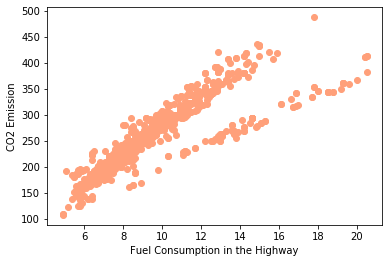

In [19]:
plt.scatter(filtered_data.ENGINESIZE, filtered_data.CO2EMISSIONS, color ='pink')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.CYLINDERS, filtered_data.CO2EMISSIONS, color ='turquoise')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.FUELCONSUMPTION_CITY, filtered_data.CO2EMISSIONS, color ='plum')
plt.xlabel("Fuel Consumption in the City")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.FUELCONSUMPTION_HWY, filtered_data.CO2EMISSIONS, color ='lightsalmon')
plt.xlabel("Fuel Consumption in the Highway")
plt.ylabel("CO2 Emission")

plt.show()

It appears that most of the variables are directly correlated with the target variable. For instance, the more cylinders a vehicle would have, the higher the CO2 emission would be. However, i do notice that some features are not completely linear but more curvy such as the Engine Size. 

## Train & Test Split

In order to conduct the Machine Learning algorithm, we will have to divide the data into train/test. We will then train with training set then test with testing set. There are many articles about how the breakdown of train/test should be. Here i will be using 80/20 train/test split.

In [21]:
msk=np.random.rand(len(df))<0.8
train=filtered_data[msk]
test=filtered_data[~msk]

Let us now look at the training set distribution. We will see that it is similar to the above scatter plots we created earlier

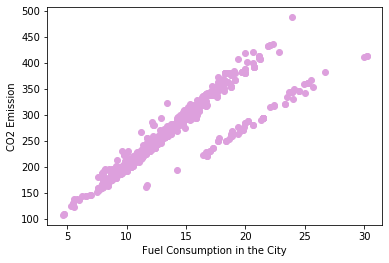

In [25]:
plt.scatter(train.FUELCONSUMPTION_CITY,train.CO2EMISSIONS, color = 'plum')
plt.xlabel("Fuel Consumption in the City")
plt.ylabel("CO2 Emission")
plt.show()

## Multiple Linear Regression
There are multiple variables that predict CO2 Emission in this dataset; hence, we will be using Multiple Linear Regression to predict the CO2 Emissions

In [26]:
from sklearn import linear_model


In [31]:
regression=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(x,y)

print ('Coefficients:',regression.coef_)

Coefficients: [[10.85036313  7.22367692 -2.98854931 -3.68909653 16.19268533]]


In [41]:
#y_hat estimated output
y_hat= regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regression.score(x, y))

Residual sum of squares: 562.51
Variance score: 0.85


## Conclusion

We were successfully able to predict the CO2 Emissions for the current dataset with 85% accuracy. The best possible score we could have for the Variance is 1, the lower the value, the worse your prediction is. Here we have an 85% accuracy rate which I am happy about. 

Alternatively, one may use Polynomial Regression or Simple Linear Regression models; however, I found Multiple Regression giving better accuracy results

Thank you!
